In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
#202331035_Nadila Kusuma

## 1. Deteksi Tepi

In [ ]:
image = cv.imread("kijang.jpg") #ngebaca parkir 
#202331035_Nadila Kusuma

In [4]:
cv.imshow("Gambar Kijang", image) #buat nampiilin gambar lewat pop up wk nya 0 biar ga ototmatis ga nutup
cv.waitKey(0)
cv.destroyAllWindows()
#202331035_Nadila Kusuma

In [5]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)                       #pake gray karna lebih baik pake grey untuk konvert ke edges
edges = cv.Canny(image,75,150)                                     #threseholding. kalau lebih dari 150 dia putih, kalau kurang dari 150 dia hitam

cv.imshow("Gambar Kijang", image)
cv.waitKey(0)  #202331035_Nadila Kusuma
cv.destroyAllWindows()

Text(0.5, 1.0, 'Gambar Edges')

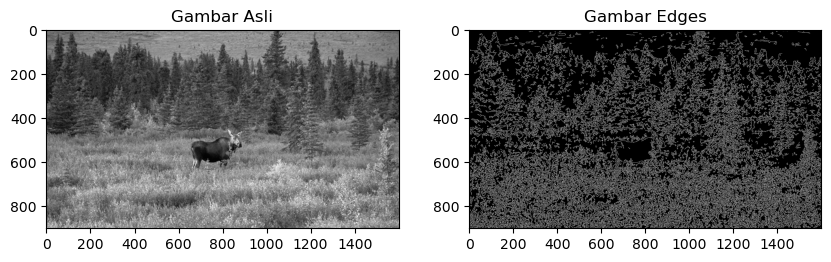

In [6]:
fig, axs = plt.subplots(1,2,figsize = (10,10)) #1 mewakili baris, 2 mewakili kolom. dengan figsize 10x10
axs = axs.ravel()

axs[0].imshow(gray, cmap="gray")
axs[0].set_title("Gambar Asli")
#202331035_Nadila Kusuma
axs[1].imshow(edges, cmap="gray")
axs[1].set_title("Gambar Edges")

In [29]:
lines = cv.HoughLinesP(edges,1,np.pi/180,30,maxLineGap=250) #untuk mendeteksi linenya, sigambar edgesnya tadi, angka 1 berarti tiap 1 pikselnya dicoba, buat np.pi/180 buat teta nya(rumus ubah ke radian). maxgap =250 itu maksimal celahnya (jadi celahnya kalo kurang dari 250 bakal digabungjadi 1 piksel)
image_line = image.copy()                                   #dicopy karena agar gambar awal ga rusak 
#202331035_Nadila Kusuma

In [31]:
for line in lines:                                                    #untuk setiap line di lines
    x1,y1,x2,y2 = line[0]                                            #line nya 0 karena kita harus mengakses indeks 0 nya terlebih dahulu (biar bisa deklarasikan semua gambar/tidak perlu deklarasi 1 1)
    cv.line(image_line, (x1,y1),(x2,y2),(100,8,255),1)                   #(100,8,255 mewakili warna BGR )1 untuk ketebalan garis piksel
#202331035_Nadila Kusuma 

Text(0.5, 1.0, 'Gambar Line')

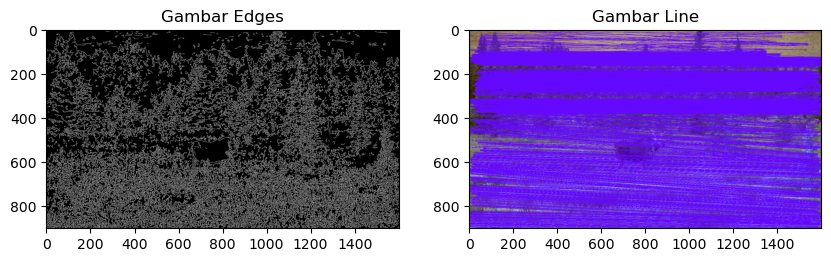

In [33]:
fig, axs = plt.subplots(1,2,figsize = (10,10))
axs = axs.ravel()

axs[0].imshow(edges, cmap="gray")
axs[0].set_title("Gambar Edges") #202331035_Nadila Kusuma

axs[1].imshow(image_line, cmap="gray")
axs[1].set_title("Gambar Line")

## 2. Geometrik

In [36]:
img_jalan = cv.imread('jalan.jpg') 
rows,cols,_ = img_jalan.shape 
print('IMG SHAPE: ', img_jalan.shape)
#202331035_Nadila Kusuma

IMG SHAPE:  (450, 678, 3)


In [25]:
# resize dengan fx=3, fy=5 (sesuai NIM 202331035)
res = cv.resize(img_jalan, None, fx=3, fy=5, interpolation=cv.INTER_CUBIC)
#202331035_Nadila Kusuma

Text(0.5, 1.0, 'Resized (fx=3, fy=5)')

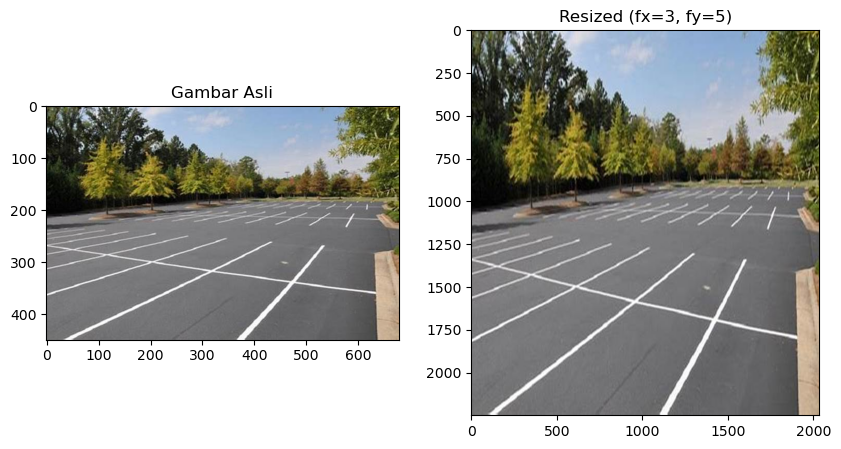

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10,5)) 
axs = axs.ravel()

axs[0].imshow(cv.cvtColor(img_jalan, cv.COLOR_BGR2RGB))
axs[0].set_title("Gambar Asli")  #202331035_Nadila Kusuma

axs[1].imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
axs[1].set_title("Resized (fx=3, fy=5)")

Text(0.5, 1.0, 'Resized 2034x2250')

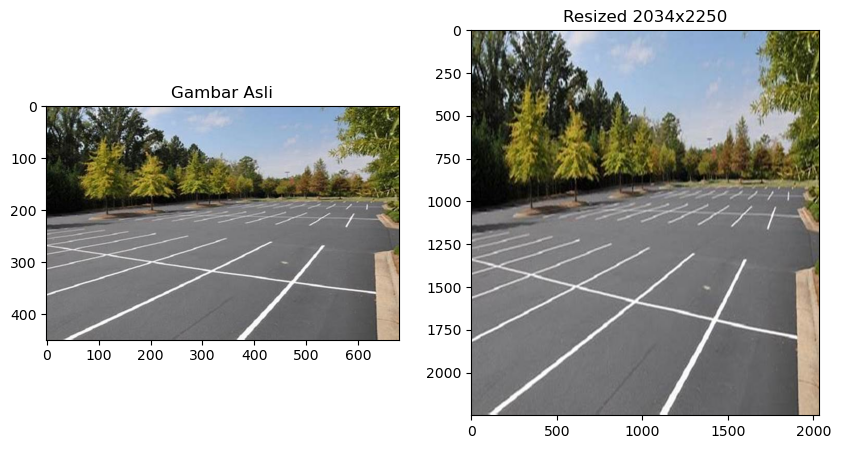

In [44]:
# resize dangan tinngi dan lebar
tinggi, lebar = img_jalan.shape[:2] 
res2 = cv.resize(img_jalan, (3*lebar, 5*tinggi), interpolation=cv.INTER_CUBIC)  # 3x lebar, 5x tinggi

# Plot perbandingan
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs = axs.ravel()

axs[0].imshow(cv.cvtColor(img_jalan, cv.COLOR_BGR2RGB))
axs[0].set_title("Gambar Asli")   #202331035_Nadila Kusuma

axs[1].imshow(cv.cvtColor(res2, cv.COLOR_BGR2RGB))
axs[1].set_title(f"Resized {3*lebar}x{5*tinggi}")

In [46]:
# rotasi nim ganjil
img_jalan_gray = cv.cvtColor(img_jalan, cv.COLOR_BGR2GRAY)  # Konversi ke grayscale seperti contoh dog.jpg
rows, cols = img_jalan_gray.shape 
print("IMG Shape: ", img_jalan_gray.shape) 
#202331035_Nadila Kusuma

IMG Shape:  (450, 678)


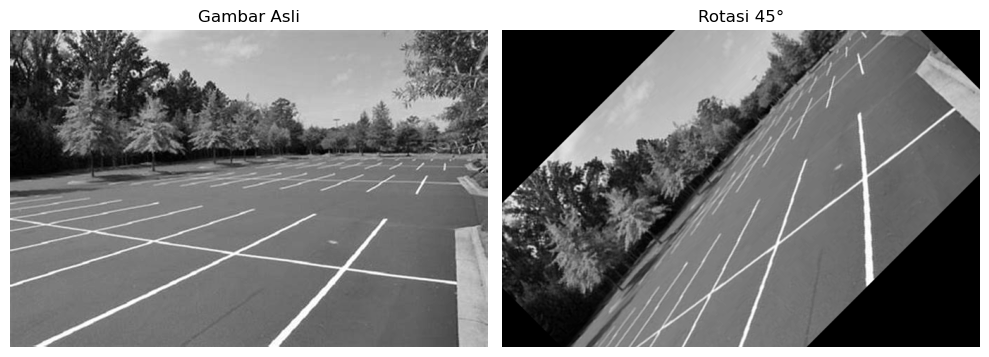

In [48]:
# Rotasi 45 derajat (sesuai NIM ganjil)
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 45, 1)  
img_putar = cv.warpAffine(img_jalan_gray, M, (cols, rows))
#202331035_Nadila Kusuma

# Plot hasil rotasi
fig, axs = plt.subplots(1, 2, figsize=(10,5)) 
axs = axs.ravel()

axs[0].imshow(img_jalan_gray, cmap='gray')
axs[0].set_title("Gambar Asli")

axs[1].imshow(img_putar, cmap='gray')
axs[1].set_title("Rotasi 45°")

for a in axs:
    a.axis('off')
    
plt.tight_layout()
plt.show() #202331035_Nadila Kusuma

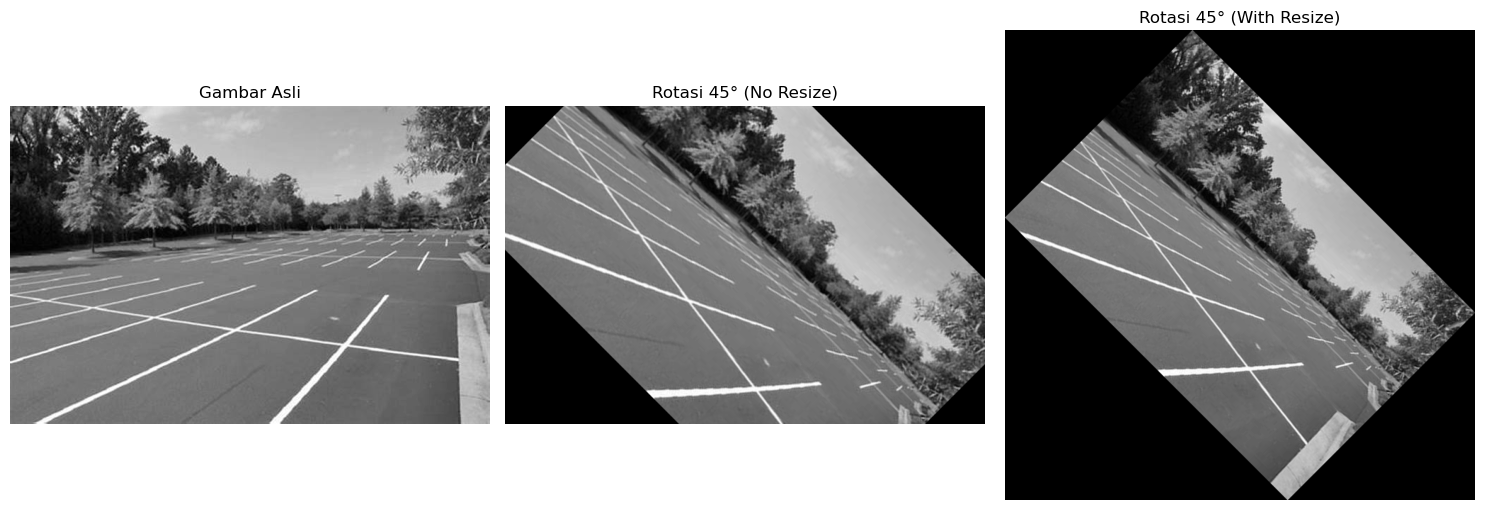

In [50]:
# rotasi dengan skimage
from skimage import io, transform 

img_jalan2 = io.imread('jalan.jpg')

rotated = transform.rotate(img_jalan_gray, -45, resize=False) 
rotated2 = transform.rotate(img_jalan_gray, -45, resize=True) 

fig, axs = plt.subplots(1, 3, figsize=(15,5)) 
axs = axs.ravel()
#202331035_Nadila Kusuma 
axs[0].imshow(img_jalan_gray, cmap='gray')
axs[0].set_title("Gambar Asli")

axs[1].imshow(rotated, cmap='gray')
axs[1].set_title("Rotasi 45° (No Resize)")

axs[2].imshow(rotated2, cmap='gray')
axs[2].set_title("Rotasi 45° (With Resize)")

for a in axs:
    a.axis('off')
    
plt.tight_layout()
plt.show()

## 3. Geometrik

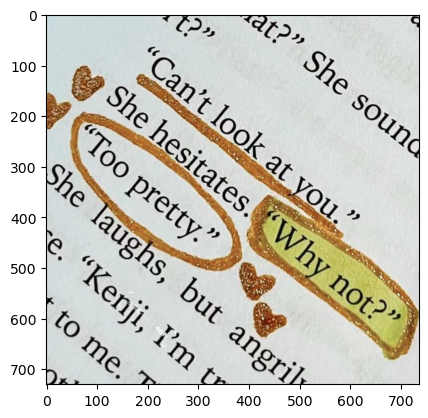

In [65]:
from skimage import io, transform #io buat baca sama nampilin
t = cv.imread('text.jpg')
plt.imshow(t)
#202331035_Nadila Kusuma

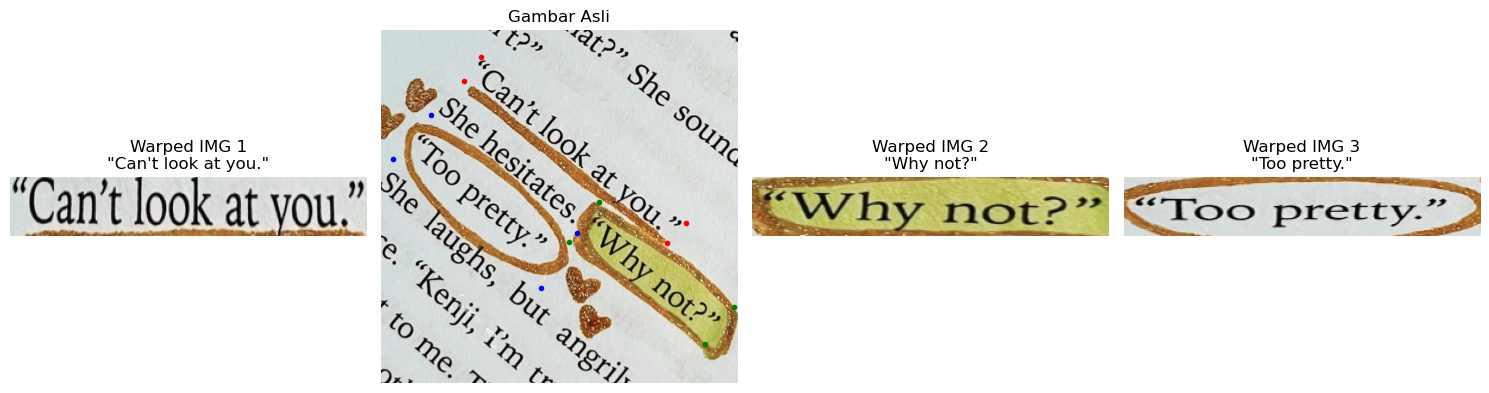

In [67]:
src = np.array([
    [0, 0],
    [0, 50],
    [300, 50],
    [300, 0]
])

# Crop 1: "Can't look at you."
crop = np.array([
    [205, 57],
    [171, 105],
    [589, 441],
    [629, 398]
])

# Crop 2: "Why not?"
crop2 = np.array([
    [449, 355],
    [388, 439],
    [669, 648],
    [729, 572]
])

# Crop 3: "Too pretty."
crop3 = np.array([
    [103, 176],
    [24, 266],
    [330, 534],
    [404, 419]
]) #202331035_Nadila Kusuma 

tform = transform.ProjectiveTransform()
tform.estimate(src, crop)
warped = transform.warp(t, tform, output_shape=(50, 300))

tform2 = transform.ProjectiveTransform()
tform2.estimate(src, crop2)
warped2 = transform.warp(t, tform2, output_shape=(50, 300))

tform3 = transform.ProjectiveTransform()
tform3.estimate(src, crop3)
warped3 = transform.warp(t, tform3, output_shape=(50, 300))
#202331035_Nadila Kusuma

# Plot hasil
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs = axs.ravel()

axs[0].imshow(warped)
axs[0].set_title("Warped IMG 1\n\"Can't look at you.\"")

axs[1].imshow(t)
axs[1].plot(crop[:, 0], crop[:, 1], '.r')
axs[1].plot(crop2[:, 0], crop2[:, 1], '.g')
axs[1].plot(crop3[:, 0], crop3[:, 1], '.b')
axs[1].set_title("Gambar Asli")

axs[2].imshow(warped2)
axs[2].set_title("Warped IMG 2\n\"Why not?\"")

axs[3].imshow(warped3)
axs[3].set_title("Warped IMG 3\n\"Too pretty.\"")

for a in axs:
    a.axis('off')

plt.tight_layout()
plt.show() #202331035_Nadila Kusuma 